In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import statsmodels.api as sm

In [4]:
# 파일 불러오기

num = pd.read_csv('/Users/annakim/Library/CloudStorage/OneDrive-성신여자대학교/BOAZ/ADV/버블클라우드/data/부산_반려동물수.csv', encoding = 'cp949')
den = pd.read_csv('/Users/annakim/Library/CloudStorage/OneDrive-성신여자대학교/BOAZ/ADV/버블클라우드/data/부산_인구밀도.csv', encoding = 'cp949')

In [6]:
num

,특성별(1),특성별(2),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7
0,특성별(1),특성별(2),사육하고 있지 않다,사육하고 있다,실내사육,실내사육,실내사육,실외사육,실외사육,실외사육
1,특성별(1),특성별(2),소계,소계,개,고양이,기타,개,고양이,기타
2,전체,소계,88.2,11.8,74.5,15.3,6.3,7.1,0.7,0.2
3,성별,남,88.3,11.7,74.2,14.1,6.8,7.5,0.8,0.2
4,성별,여,87.9,12.1,75.0,17.8,5.2,6.0,0.6,0.1
5,구군별,중구,86.9,13.1,84.2,16.3,1.9,1.4,0.0,0.0
6,구군별,서구,88.4,11.6,77.1,17.2,3.4,4.0,0.0,0.0
7,구군별,동구,86.7,13.3,77.7,13.4,2.1,10.4,0.9,0.0
8,구군별,영도구,87.7,12.3,68.8,17.5,4.4,13.6,0.0,1.0
9,구군별,부산진구,86.5,13.5,78.7,11.2,3.2,7.2,1.5,0.0


In [8]:
# num 데이터에서 구군별 통계만 남기기

for i in range(num.shape[0]):
    if num['특성별(1)'][i] != '구군별':
        num.drop(index = i, inplace = True)

In [9]:
# 구 이름을 인덱스로 설정

num.set_index('특성별(2)', inplace = True)

In [10]:
# 필요 없는 컬럼 삭제

num.drop('특성별(1)', axis = 1, inplace = True)
num

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7
특성별(2),,,,,,,,
중구,86.9,13.1,84.2,16.3,1.9,1.4,0.0,0.0
서구,88.4,11.6,77.1,17.2,3.4,4.0,0.0,0.0
동구,86.7,13.3,77.7,13.4,2.1,10.4,0.9,0.0
영도구,87.7,12.3,68.8,17.5,4.4,13.6,0.0,1.0
부산진구,86.5,13.5,78.7,11.2,3.2,7.2,1.5,0.0
동래구,89.4,10.6,77.2,14.7,9.4,4.2,1.8,0.9
남구,90.2,9.8,78.9,10.1,4.8,8.4,0.0,0.0
북구,86.8,13.2,77.2,14.5,11.6,0.6,0.0,0.0
해운대구,87.2,12.8,80.1,14.6,7.3,2.5,0.4,0.0


In [13]:
# 컬럼명 알아볼 수 있게 수정

num.rename(columns = {'2017' : '사육하고 있지 않다', '2017.1' : '사육하고 있다'}, inplace = True)
num.head()

,사육하고 있지 않다,사육하고 있다,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7
특성별(2),,,,,,,,
중구,86.9,13.1,84.2,16.3,1.9,1.4,0.0,0.0
서구,88.4,11.6,77.1,17.2,3.4,4.0,0.0,0.0
동구,86.7,13.3,77.7,13.4,2.1,10.4,0.9,0.0
영도구,87.7,12.3,68.8,17.5,4.4,13.6,0.0,1.0
부산진구,86.5,13.5,78.7,11.2,3.2,7.2,1.5,0.0


In [14]:
den

,구·군별,인구밀도 (명/㎢)
0,중구,15114
1,서구,7596
2,동구,9150
3,영도구,7835
4,부산진구,11921
5,동래구,16544
6,남구,9920
7,북구,7187
8,해운대구,7721
9,사하구,7415


In [15]:
# 구 이름을 인덱스로 설정

den.set_index('구·군별', inplace = True)

In [16]:
# num에서 사육하고 있다고 응답한 비율과 den의 인구 밀도를 곱해 반려동물 수 구하기

temp = []
for i in range(num.shape[0]):
    temp.append(round(float(num['사육하고 있다'][i]) * float(den['인구밀도 (명/㎢)'][i]) / 100))
    
num['반려동물수'] = temp

In [17]:
num

,사육하고 있지 않다,사육하고 있다,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,반려동물수
특성별(2),,,,,,,,,
중구,86.9,13.1,84.2,16.3,1.9,1.4,0.0,0.0,1980
서구,88.4,11.6,77.1,17.2,3.4,4.0,0.0,0.0,881
동구,86.7,13.3,77.7,13.4,2.1,10.4,0.9,0.0,1217
영도구,87.7,12.3,68.8,17.5,4.4,13.6,0.0,1.0,964
부산진구,86.5,13.5,78.7,11.2,3.2,7.2,1.5,0.0,1609
동래구,89.4,10.6,77.2,14.7,9.4,4.2,1.8,0.9,1754
남구,90.2,9.8,78.9,10.1,4.8,8.4,0.0,0.0,972
북구,86.8,13.2,77.2,14.5,11.6,0.6,0.0,0.0,949
해운대구,87.2,12.8,80.1,14.6,7.3,2.5,0.4,0.0,988


In [18]:
# 데이터프레임 합치기

busan = pd.concat([num, den], axis = 1)
busan

,사육하고 있지 않다,사육하고 있다,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,반려동물수,인구밀도 (명/㎢)
중구,86.9,13.1,84.2,16.3,1.9,1.4,0.0,0.0,1980,15114
서구,88.4,11.6,77.1,17.2,3.4,4.0,0.0,0.0,881,7596
동구,86.7,13.3,77.7,13.4,2.1,10.4,0.9,0.0,1217,9150
영도구,87.7,12.3,68.8,17.5,4.4,13.6,0.0,1.0,964,7835
부산진구,86.5,13.5,78.7,11.2,3.2,7.2,1.5,0.0,1609,11921
동래구,89.4,10.6,77.2,14.7,9.4,4.2,1.8,0.9,1754,16544
남구,90.2,9.8,78.9,10.1,4.8,8.4,0.0,0.0,972,9920
북구,86.8,13.2,77.2,14.5,11.6,0.6,0.0,0.0,949,7187
해운대구,87.2,12.8,80.1,14.6,7.3,2.5,0.4,0.0,988,7721
사하구,89.1,10.9,66.5,17.4,8.0,9.1,0.0,0.0,808,7415


In [19]:
# 필요 없는 컬럼 삭제

busan.drop(['사육하고 있지 않다', '사육하고 있다', '2017.2', '2017.3', '2017.4', '2017.5', '2017.6', '2017.7'], axis = 1, inplace = True)
busan

,반려동물수,인구밀도 (명/㎢)
중구,1980,15114
서구,881,7596
동구,1217,9150
영도구,964,7835
부산진구,1609,11921
동래구,1754,16544
남구,972,9920
북구,949,7187
해운대구,988,7721
사하구,808,7415


In [20]:
# 데이터 추가로 불러오기

num = pd.read_excel('/Users/annakim/Library/CloudStorage/OneDrive-성신여자대학교/BOAZ/ADV/버블클라우드/data/부산시 반려동물미용업.xlsx')

In [21]:
# 데이터 확인

num.head()

,Unnamed: 0,소재지,시,구,동,업체명
0,0,부산광역시 강서구 명지동,부산광역시,강서구,명지동,27
1,1,부산광역시 강서구 신호동,부산광역시,강서구,신호동,5
2,2,부산광역시 강서구 지사동,부산광역시,강서구,지사동,1
3,3,부산광역시 강서구 천성동,부산광역시,강서구,천성동,1
4,4,부산광역시 금정구 구서동,부산광역시,금정구,구서동,7


In [22]:
# 구별 업체 수만 뽑아내기

num_gu = pd.DataFrame(num.groupby('구')['업체명'].sum())
num_gu

,업체명
구,
강서구,34
금정구,38
기장군,32
남구,44
동구,11
동래구,54
부산진구,71
북구,51
사상구,17


In [23]:
# 인덱스 없애기

busan.reset_index(inplace = True)
busan

,index,반려동물수,인구밀도 (명/㎢)
0,중구,1980,15114
1,서구,881,7596
2,동구,1217,9150
3,영도구,964,7835
4,부산진구,1609,11921
5,동래구,1754,16544
6,남구,972,9920
7,북구,949,7187
8,해운대구,988,7721
9,사하구,808,7415


In [25]:
# 컬럼명 변경

busan.rename(columns = {'index' : '구', '인구밀도 (명/㎢)' : '인구밀도'}, inplace = True)

In [33]:
# 두 데이터 합치기

data = pd.merge(busan, num_gu, on='구')
data

,구,반려동물수,인구밀도,업체명
0,중구,1980,15114,13
1,서구,881,7596,17
2,동구,1217,9150,11
3,영도구,964,7835,18
4,부산진구,1609,11921,71
5,동래구,1754,16544,54
6,남구,972,9920,44
7,북구,949,7187,51
8,해운대구,988,7721,93
9,사하구,808,7415,60


In [26]:
# 데이터 추가 불러오기

income = pd.read_csv('/Users/annakim/Library/CloudStorage/OneDrive-성신여자대학교/BOAZ/ADV/버블클라우드/data/소득.csv')

In [27]:
# 부산광역시에 해당하는 데이터만 뽑아오기

income_busan = income[income['시'] == '부산광역시']
income_busan.head()

,시,군구,adstrd_nm - 분할 3,adstrd_nm,adstrd_cd,legaldong_nm,legaldong_cd,tot_po,tot_hshld_co,hshld_per_po,ave_income_amt
730,부산광역시,중구,중앙동,부산광역시 중구 중앙동,2611051000,대창동1가,2611010200,3256,1626,2.0,1866.83
731,부산광역시,중구,중앙동,부산광역시 중구 중앙동,2611051000,중앙동1가,2611010400,3256,1626,2.0,2487.91
732,부산광역시,중구,중앙동,부산광역시 중구 중앙동,2611051000,중앙동2가,2611010500,3256,1626,2.0,2260.39
733,부산광역시,중구,중앙동,부산광역시 중구 중앙동,2611051000,중앙동3가,2611010600,3256,1626,2.0,2152.19
734,부산광역시,중구,중앙동,부산광역시 중구 중앙동,2611051000,중앙동4가,2611010700,3256,1626,2.0,2472.55


In [30]:
# 구별 평균 소득 구하기

income_total = pd.DataFrame(income_busan.groupby('군구')['ave_income_amt'].mean())
income_total.head()

,ave_income_amt
군구,
강서구,3517.690435
금정구,3267.862000
기장군,3408.641148
남구,2907.727059
동구,2191.144286


In [31]:
# 인덱스 없애고 컬럼 명 수정

income_total.reset_index(inplace = True)
income_total.rename(columns = {'군구' : '구'}, inplace = True)
income_total

,구,ave_income_amt
0,강서구,3517.690435
1,금정구,3267.862000
2,기장군,3408.641148
3,남구,2907.727059
4,동구,2191.144286
5,동래구,3544.090667
6,부산진구,2843.894583
7,북구,3266.720000
8,사상구,3003.813333
9,사하구,2508.247500


In [34]:
# 최종 데이터프레임 완성

final = pd.merge(data, income_total, on = '구')
final.rename(columns = {'ave_income_amt' : '평균소득수준'}, inplace = True)
final

,구,반려동물수,인구밀도,업체명,평균소득수준
0,중구,1980,15114,13,2944.313415
1,서구,881,7596,17,2434.321923
2,동구,1217,9150,11,2191.144286
3,영도구,964,7835,18,2193.353333
4,부산진구,1609,11921,71,2843.894583
5,동래구,1754,16544,54,3544.090667
6,남구,972,9920,44,2907.727059
7,북구,949,7187,51,3266.720000
8,해운대구,988,7721,93,3636.078947
9,사하구,808,7415,60,2508.247500


In [36]:
# 최종 데이터 내보내기

final.to_csv('부산_최종.csv')

In [4]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
data.head()

,구,반려동물수,인구밀도,업체명,평균소득수준
0,중구,1980,15114,13,120716.85
1,서구,881,7596,17,63292.37
2,동구,1217,9150,11,30676.02
3,영도구,964,7835,18,59220.54
4,부산진구,1609,11921,71,68253.47


In [4]:
processed_data = data.copy()
# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['반려동물수', '인구밀도', '평균소득수준']] = scaler.fit_transform(processed_data[['반려동물수', '인구밀도', '평균소득수준']])

In [5]:
y = processed_data['업체명']
x = processed_data[['반려동물수', '인구밀도', '평균소득수준']]

In [40]:
multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    업체명   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                              10.70
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                    0.000809
Time:                        20:25:53   Log-Likelihood:                         -74.158
No. Observations:                  16   AIC:                                      154.3
Df Residuals:                      13   BIC:                                      156.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
반려동물수         -0.0014      0.042     -0.033      0.975      -0.091       0.088
인구밀도           0.0028      0.005      0.609      0.553      -0.007       0.013
평균소득수준         0.0002      0.000      1.615      0.130   -6.49e-05       0.000
==============================================================================
Omnibus:                        1.124   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.129
Skew:                           0.146   Prob(JB):                        0.938
Kurtosis:                       3.330   Cond. No.                         479.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

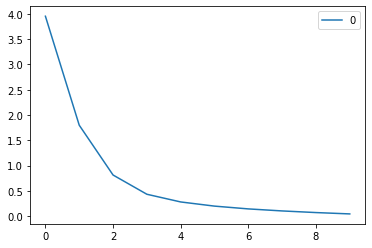

In [29]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(x)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

In [6]:
kmeans = KMeans(n_clusters=3).fit(x) #군집 3개로 나누겠다
processed_data['cluster_id'] = kmeans.labels_

In [31]:
processed_data['cluster_id'].value_counts()

0    8
1    5
2    3
Name: cluster_id, dtype: int64

In [32]:
processed_data[processed_data['cluster_id']==0]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
1,서구,0.411355,0.412434,17,0.184012,0
2,동구,0.591323,0.506965,11,0.000000,0
3,영도구,0.455811,0.426972,18,0.161040,0
6,남구,0.460096,0.553805,44,0.105812,0
7,북구,0.447777,0.387554,51,0.066523,0
8,해운대구,0.468666,0.420038,93,0.216695,0
9,사하구,0.372255,0.401423,60,0.053348,0
14,사상구,0.305303,0.305676,17,0.030295,0


In [33]:
processed_data[processed_data['cluster_id']==1]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
0,중구,1.000000,0.869761,13,0.507985,1
4,부산진구,0.801285,0.675528,71,0.212001,1
5,동래구,0.878950,0.956749,54,0.126856,1
12,연제구,0.720407,0.993978,45,0.035457,1
13,수영구,0.983931,1.000000,54,0.065326,1


In [34]:
processed_data[processed_data['cluster_id']==2]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
10,금정구,0.137118,0.163879,38,0.195662,2
11,강서구,0.000000,0.000000,34,0.283388,2
15,기장군,0.001071,0.000122,32,1.000000,2


Text(0.5, 0, 'ave income')

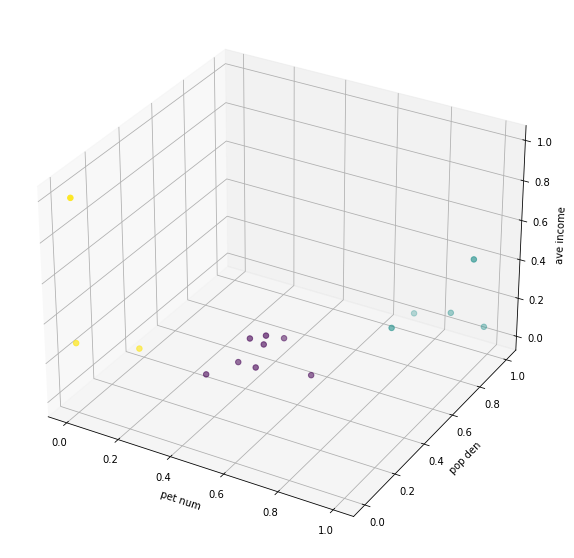

In [15]:
plt.figure(figsize = (10, 10))
axes = plt.axes(projection = '3d')
axes.scatter3D(processed_data['반려동물수'], processed_data['인구밀도'], processed_data['평균소득수준'], c = processed_data['cluster_id'], s = 30)
axes.set_xlabel('pet num')
axes.set_ylabel('pop den')
axes.set_zlabel('ave income')

1. 보라색(cluster = 0) : 반려동물 수 중간, 인구 밀도 중간, 소득 수준 낮은 집단
2. **초록색(cluster = 1)** : 반려동물 수 높고, 인구 밀도 높고, 소득 수준 낮/중간 집단
3. 노란색(cluster = 2) : 반려동물 수 적고, 인구 밀도 낮고, 소득 수준 낮은 집단

In [10]:
processed_data[processed_data['cluster_id']==2]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
0,중구,1.000000,0.869761,13,0.507985,2
4,부산진구,0.801285,0.675528,71,0.212001,2
5,동래구,0.878950,0.956749,54,0.126856,2
12,연제구,0.720407,0.993978,45,0.035457,2
13,수영구,0.983931,1.000000,54,0.065326,2


그루머노트는 애견미용샵 '관리' 앱이기 때문에 고객이 많이 없으면 굳이 그루머노트의 수요가 없을 듯  
-> 반려동물수가 높을수록 미용실 수요가 높다는 뜻  
-> 인구 밀도와 소득수준이 높으면 수요의 양적, 질적 수준이 높다는 뜻  


이 중 **'부산진구', '중구'** 가 가장 best
- 미용실 적합상권의 1순위가 지구중심권 또는 역세권, 2순위가 주거지인데
- 부산의 가장 중심상권인 서면, 남포동이 부산진구, 중구에 해당
- 3개 변수 다 적절히 높음
- 부산진구, 중구에서 현재 그루머노트 사용하는 미용실은 1개밖에 없음  

클러스터 전체 타겟팅하기!

In [11]:
processed_data.rename(columns = {'반려동물수':'반려동물수_scaled', '인구밀도':'인구밀도_scaled', '업체명':'업체수', '평균소득수준':'평균소득수준_scaled'}, inplace = True)
processed_data.head()

,구,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id
0,중구,1.000000,0.869761,13,0.507985,2
1,서구,0.411355,0.412434,17,0.184012,0
2,동구,0.591323,0.506965,11,0.000000,0
3,영도구,0.455811,0.426972,18,0.161040,0
4,부산진구,0.801285,0.675528,71,0.212001,2


In [12]:
clus = processed_data[processed_data['cluster_id']==2]
clus

,구,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id
0,중구,1.000000,0.869761,13,0.507985,2
4,부산진구,0.801285,0.675528,71,0.212001,2
5,동래구,0.878950,0.956749,54,0.126856,2
12,연제구,0.720407,0.993978,45,0.035457,2
13,수영구,0.983931,1.000000,54,0.065326,2


In [13]:
final = pd.merge(data, processed_data, on = '구')
final.drop('업체명', axis = 1, inplace = True)
final

,구,반려동물수,인구밀도,평균소득수준,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id
0,중구,1980,15114,120716.85,1.000000,0.869761,13,0.507985,2
1,서구,881,7596,63292.37,0.411355,0.412434,17,0.184012,0
2,동구,1217,9150,30676.02,0.591323,0.506965,11,0.000000,0
3,영도구,964,7835,59220.54,0.455811,0.426972,18,0.161040,0
4,부산진구,1609,11921,68253.47,0.801285,0.675528,71,0.212001,2
5,동래구,1754,16544,53161.36,0.878950,0.956749,54,0.126856,2
6,남구,972,9920,49431.36,0.460096,0.553805,44,0.105812,0
7,북구,949,7187,42467.36,0.447777,0.387554,51,0.066523,0
8,해운대구,988,7721,69085.50,0.468666,0.420038,93,0.216695,0
9,사하구,808,7415,40131.96,0.372255,0.401423,60,0.053348,0


In [14]:
temp = final[final['cluster_id']==2]

temp[['반려동물수_rescaled', '인구밀도_rescaled', '평균소득수준_rescaled', '업체수_rescaled']] = scaler.fit_transform(temp[['반려동물수', '인구밀도', '평균소득수준', '업체수']])
temp.drop(['반려동물수', '인구밀도', '평균소득수준', '반려동물수_scaled', '인구밀도_scaled', '평균소득수준_scaled', '업체수', 'cluster_id'], axis = 1, inplace = True)
temp

/var/folders/jc/r06f24ps7fl0l4jxt1pj77dw0000gn/T/ipykernel_2913/3934500297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[['반려동물수_rescaled', '인구밀도_rescaled', '평균소득수준_rescaled', '업체수_rescaled']] = scaler.fit_transform(temp[['반려동물수', '인구밀도', '평균소득수준', '업체수']])
/var/folders/jc/r06f24ps7fl0l4jxt1pj77dw0000gn/T/ipykernel_2913/3934500297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[['반려동물수_rescaled', '인구밀도_rescaled', '평균소득수준_rescaled', '업체수_rescaled']] = scaler.fit_transform(temp[['반려동물수', '

,구,반려동물수_rescaled,인구밀도_rescaled,평균소득수준_rescaled,업체수_rescaled
0,중구,1.000000,0.598613,1.000000,0.000000
4,부산진구,0.289272,0.000000,0.373617,1.000000
5,동래구,0.567050,0.866704,0.193426,0.706897
12,연제구,0.000000,0.981440,0.000000,0.551724
13,수영구,0.942529,1.000000,0.063210,0.706897


In [15]:
final_ = pd.merge(final, temp, how = 'outer', on = '구')
final_

,구,반려동물수,인구밀도,평균소득수준,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id,반려동물수_rescaled,인구밀도_rescaled,평균소득수준_rescaled,업체수_rescaled
0,중구,1980,15114,120716.85,1.000000,0.869761,13,0.507985,2,1.000000,0.598613,1.000000,0.000000
1,서구,881,7596,63292.37,0.411355,0.412434,17,0.184012,0,NaN,NaN,NaN,NaN
2,동구,1217,9150,30676.02,0.591323,0.506965,11,0.000000,0,NaN,NaN,NaN,NaN
3,영도구,964,7835,59220.54,0.455811,0.426972,18,0.161040,0,NaN,NaN,NaN,NaN
4,부산진구,1609,11921,68253.47,0.801285,0.675528,71,0.212001,2,0.289272,0.000000,0.373617,1.000000
5,동래구,1754,16544,53161.36,0.878950,0.956749,54,0.126856,2,0.567050,0.866704,0.193426,0.706897
6,남구,972,9920,49431.36,0.460096,0.553805,44,0.105812,0,NaN,NaN,NaN,NaN
7,북구,949,7187,42467.36,0.447777,0.387554,51,0.066523,0,NaN,NaN,NaN,NaN
8,해운대구,988,7721,69085.50,0.468666,0.420038,93,0.216695,0,NaN,NaN,NaN,NaN
9,사하구,808,7415,40131.96,0.372255,0.401423,60,0.053348,0,NaN,NaN,NaN,NaN


In [16]:
final_.to_csv('data/부산_전체.csv')